<a href="https://colab.research.google.com/github/mshilpaa/EVA4/blob/master/Session%208/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# mount gdrive and unzip data
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import sys
folder = '/content/gdrive/My Drive/Colab Notebooks/s8'
sys.path.append(folder)

In [0]:
%matplotlib inline
import torch
import data_loading
import show_images
import dnn_architecture
import train_and_test
import evaluate

In [4]:
classes, trainloader, testloader = data_loading.load()

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
CUDA Available? True


shape: torch.Size([128, 3, 32, 32])
  cat truck truck   cat   cat


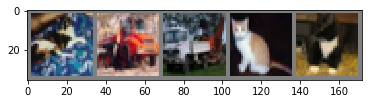

In [5]:
show_images.show_random_images(trainloader, classes)

In [6]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = dnn_architecture.Net().to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
           Dropout-5           [-1, 64, 32, 32]               0
            Conv2d-6           [-1, 64, 32, 32]          36,864
       BatchNorm2d-7           [-1, 64, 32, 32]             128
           Dropout-8           [-1, 64, 32, 32]               0
        BasicBlock-9           [-1, 64, 32, 32]               0
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
          Dropout-12           [-1, 64, 32, 32]               0
           Conv2d-13           [-1, 64, 32, 32]          36,864
      BatchNorm2d-14           [-1

In [0]:
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR,MultiStepLR

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9,weight_decay=0.0005)
scheduler = MultiStepLR(optimizer, milestones=[10,20], gamma=0.1)

In [8]:

EPOCHS = 50
for epoch in range(EPOCHS):
    print("EPOCH:", epoch+1, 'LR:',optimizer.param_groups[0]['lr'])
    train_and_test.train(model, device, trainloader, optimizer, criterion, epoch)
    scheduler.step()
    train_and_test.test(model, device, criterion, testloader)

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 1 LR: 0.1


Loss=1.5104882717132568 Batch_id=390 Accuracy=31.11: 100%|██████████| 391/391 [00:30<00:00, 13.65it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0122, Accuracy: 4221/10000 (42.21%)

EPOCH: 2 LR: 0.1


Loss=1.4848625659942627 Batch_id=390 Accuracy=52.94: 100%|██████████| 391/391 [00:31<00:00, 12.60it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0094, Accuracy: 5749/10000 (57.49%)

EPOCH: 3 LR: 0.1


Loss=0.9132412075996399 Batch_id=390 Accuracy=64.16: 100%|██████████| 391/391 [00:31<00:00, 13.59it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0071, Accuracy: 6803/10000 (68.03%)

EPOCH: 4 LR: 0.1


Loss=0.7431083917617798 Batch_id=390 Accuracy=71.89: 100%|██████████| 391/391 [00:31<00:00, 13.64it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0060, Accuracy: 7351/10000 (73.51%)

EPOCH: 5 LR: 0.1


Loss=0.6236081123352051 Batch_id=390 Accuracy=76.71: 100%|██████████| 391/391 [00:30<00:00, 13.64it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0055, Accuracy: 7624/10000 (76.24%)

EPOCH: 6 LR: 0.1


Loss=0.5067848563194275 Batch_id=390 Accuracy=80.32: 100%|██████████| 391/391 [00:30<00:00, 12.78it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0054, Accuracy: 7644/10000 (76.44%)

EPOCH: 7 LR: 0.1


Loss=0.5295071601867676 Batch_id=390 Accuracy=82.49: 100%|██████████| 391/391 [00:31<00:00, 13.83it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0056, Accuracy: 7645/10000 (76.45%)

EPOCH: 8 LR: 0.1


Loss=0.5944281816482544 Batch_id=390 Accuracy=84.00: 100%|██████████| 391/391 [00:30<00:00, 12.68it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0048, Accuracy: 8013/10000 (80.13%)

EPOCH: 9 LR: 0.1


Loss=0.535886287689209 Batch_id=390 Accuracy=85.31: 100%|██████████| 391/391 [00:31<00:00, 12.54it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0053, Accuracy: 7793/10000 (77.93%)

EPOCH: 10 LR: 0.1


Loss=0.5377975106239319 Batch_id=390 Accuracy=86.21: 100%|██████████| 391/391 [00:31<00:00, 13.61it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0050, Accuracy: 7898/10000 (78.98%)

EPOCH: 11 LR: 0.010000000000000002


Loss=0.17443132400512695 Batch_id=390 Accuracy=94.18: 100%|██████████| 391/391 [00:31<00:00, 13.62it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 8744/10000 (87.44%)

EPOCH: 12 LR: 0.010000000000000002


Loss=0.2118668556213379 Batch_id=390 Accuracy=96.49: 100%|██████████| 391/391 [00:30<00:00, 13.55it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 8731/10000 (87.31%)

EPOCH: 13 LR: 0.010000000000000002


Loss=0.06104416400194168 Batch_id=390 Accuracy=97.77: 100%|██████████| 391/391 [00:31<00:00, 13.55it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 8751/10000 (87.51%)

EPOCH: 14 LR: 0.010000000000000002


Loss=0.042838841676712036 Batch_id=390 Accuracy=98.68: 100%|██████████| 391/391 [00:31<00:00, 13.46it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 8746/10000 (87.46%)

EPOCH: 15 LR: 0.010000000000000002


Loss=0.007223146967589855 Batch_id=390 Accuracy=99.12: 100%|██████████| 391/391 [00:31<00:00, 13.50it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 8771/10000 (87.71%)

EPOCH: 16 LR: 0.010000000000000002


Loss=0.014744600281119347 Batch_id=390 Accuracy=99.42: 100%|██████████| 391/391 [00:31<00:00, 13.45it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 8753/10000 (87.53%)

EPOCH: 17 LR: 0.010000000000000002


Loss=0.015028392896056175 Batch_id=390 Accuracy=99.58: 100%|██████████| 391/391 [00:31<00:00, 13.39it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 8752/10000 (87.52%)

EPOCH: 18 LR: 0.010000000000000002


Loss=0.019482558593153954 Batch_id=390 Accuracy=99.69: 100%|██████████| 391/391 [00:31<00:00, 12.36it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 8762/10000 (87.62%)

EPOCH: 19 LR: 0.010000000000000002


Loss=0.031231367960572243 Batch_id=390 Accuracy=99.77: 100%|██████████| 391/391 [00:31<00:00, 12.34it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 8767/10000 (87.67%)

EPOCH: 20 LR: 0.010000000000000002


Loss=0.015505540184676647 Batch_id=390 Accuracy=99.83: 100%|██████████| 391/391 [00:31<00:00, 13.54it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0039, Accuracy: 8748/10000 (87.48%)

EPOCH: 21 LR: 0.0010000000000000002


Loss=0.00302450661547482 Batch_id=390 Accuracy=99.88: 100%|██████████| 391/391 [00:30<00:00, 13.48it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 8803/10000 (88.03%)

EPOCH: 22 LR: 0.0010000000000000002


Loss=0.008479553274810314 Batch_id=390 Accuracy=99.88: 100%|██████████| 391/391 [00:31<00:00, 13.53it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 8792/10000 (87.92%)

EPOCH: 23 LR: 0.0010000000000000002


Loss=0.02188204601407051 Batch_id=390 Accuracy=99.93: 100%|██████████| 391/391 [00:31<00:00, 13.70it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 8792/10000 (87.92%)

EPOCH: 24 LR: 0.0010000000000000002


Loss=0.010842996649444103 Batch_id=390 Accuracy=99.90: 100%|██████████| 391/391 [00:30<00:00, 13.61it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 8803/10000 (88.03%)

EPOCH: 25 LR: 0.0010000000000000002


Loss=0.0067330896854400635 Batch_id=390 Accuracy=99.92: 100%|██████████| 391/391 [00:31<00:00, 12.58it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 8786/10000 (87.86%)

EPOCH: 26 LR: 0.0010000000000000002


Loss=0.0041175782680511475 Batch_id=390 Accuracy=99.94: 100%|██████████| 391/391 [00:30<00:00, 13.44it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 8791/10000 (87.91%)

EPOCH: 27 LR: 0.0010000000000000002


Loss=0.011162430047988892 Batch_id=390 Accuracy=99.95: 100%|██████████| 391/391 [00:30<00:00, 12.62it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 8792/10000 (87.92%)

EPOCH: 28 LR: 0.0010000000000000002


Loss=0.010455578565597534 Batch_id=390 Accuracy=99.95: 100%|██████████| 391/391 [00:30<00:00, 13.65it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 8790/10000 (87.90%)

EPOCH: 29 LR: 0.0010000000000000002


Loss=0.005133777856826782 Batch_id=390 Accuracy=99.94: 100%|██████████| 391/391 [00:31<00:00, 12.61it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 8802/10000 (88.02%)

EPOCH: 30 LR: 0.0010000000000000002


Loss=0.007670700550079346 Batch_id=390 Accuracy=99.95: 100%|██████████| 391/391 [00:31<00:00, 13.63it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 8787/10000 (87.87%)

EPOCH: 31 LR: 0.0010000000000000002


Loss=0.02942551299929619 Batch_id=390 Accuracy=99.93: 100%|██████████| 391/391 [00:30<00:00, 12.63it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 8792/10000 (87.92%)

EPOCH: 32 LR: 0.0010000000000000002


Loss=0.002614527940750122 Batch_id=390 Accuracy=99.96: 100%|██████████| 391/391 [00:30<00:00, 13.38it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 8793/10000 (87.93%)

EPOCH: 33 LR: 0.0010000000000000002


Loss=0.004030019044876099 Batch_id=390 Accuracy=99.96: 100%|██████████| 391/391 [00:31<00:00, 12.40it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 8797/10000 (87.97%)

EPOCH: 34 LR: 0.0010000000000000002


Loss=0.0039567528292536736 Batch_id=390 Accuracy=99.96: 100%|██████████| 391/391 [00:30<00:00, 13.54it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 8796/10000 (87.96%)

EPOCH: 35 LR: 0.0010000000000000002


Loss=0.017822425812482834 Batch_id=390 Accuracy=99.95: 100%|██████████| 391/391 [00:31<00:00, 12.13it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 8804/10000 (88.04%)

EPOCH: 36 LR: 0.0010000000000000002


Loss=0.020039867609739304 Batch_id=390 Accuracy=99.96: 100%|██████████| 391/391 [00:31<00:00, 12.30it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 8770/10000 (87.70%)

EPOCH: 37 LR: 0.0010000000000000002


Loss=0.01155582070350647 Batch_id=390 Accuracy=99.95: 100%|██████████| 391/391 [00:31<00:00, 12.40it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 8805/10000 (88.05%)

EPOCH: 38 LR: 0.0010000000000000002


Loss=0.0054382383823394775 Batch_id=390 Accuracy=99.95: 100%|██████████| 391/391 [00:30<00:00, 13.72it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0039, Accuracy: 8805/10000 (88.05%)

EPOCH: 39 LR: 0.0010000000000000002


Loss=0.002895921468734741 Batch_id=390 Accuracy=99.97: 100%|██████████| 391/391 [00:31<00:00, 13.61it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 8814/10000 (88.14%)

EPOCH: 40 LR: 0.0010000000000000002


Loss=0.008572387509047985 Batch_id=390 Accuracy=99.97: 100%|██████████| 391/391 [00:31<00:00, 13.49it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 8796/10000 (87.96%)

EPOCH: 41 LR: 0.0010000000000000002


Loss=0.00964007992297411 Batch_id=390 Accuracy=99.98: 100%|██████████| 391/391 [00:31<00:00, 12.39it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 8792/10000 (87.92%)

EPOCH: 42 LR: 0.0010000000000000002


Loss=0.007568544242531061 Batch_id=390 Accuracy=99.99: 100%|██████████| 391/391 [00:31<00:00, 13.46it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 8810/10000 (88.10%)

EPOCH: 43 LR: 0.0010000000000000002


Loss=0.010394942946732044 Batch_id=390 Accuracy=99.98: 100%|██████████| 391/391 [00:31<00:00, 12.43it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 8810/10000 (88.10%)

EPOCH: 44 LR: 0.0010000000000000002


Loss=0.00693777808919549 Batch_id=390 Accuracy=99.97: 100%|██████████| 391/391 [00:31<00:00, 13.32it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 8821/10000 (88.21%)

EPOCH: 45 LR: 0.0010000000000000002


Loss=0.0022047520615160465 Batch_id=390 Accuracy=99.96: 100%|██████████| 391/391 [00:31<00:00, 13.54it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 8813/10000 (88.13%)

EPOCH: 46 LR: 0.0010000000000000002


Loss=0.004502534866333008 Batch_id=390 Accuracy=99.97: 100%|██████████| 391/391 [00:31<00:00, 13.18it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 8806/10000 (88.06%)

EPOCH: 47 LR: 0.0010000000000000002


Loss=0.005333894398063421 Batch_id=390 Accuracy=99.96: 100%|██████████| 391/391 [00:30<00:00, 12.66it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 8805/10000 (88.05%)

EPOCH: 48 LR: 0.0010000000000000002


Loss=0.0035607218742370605 Batch_id=390 Accuracy=99.97: 100%|██████████| 391/391 [00:31<00:00, 13.36it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 8810/10000 (88.10%)

EPOCH: 49 LR: 0.0010000000000000002


Loss=0.0027369321323931217 Batch_id=390 Accuracy=99.98: 100%|██████████| 391/391 [00:30<00:00, 13.61it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 8799/10000 (87.99%)

EPOCH: 50 LR: 0.0010000000000000002


Loss=0.0029024898540228605 Batch_id=390 Accuracy=99.97: 100%|██████████| 391/391 [00:30<00:00, 13.50it/s]



Test set: Average loss: 0.0038, Accuracy: 8800/10000 (88.00%)



GroundTruth:  horse   car plane   car  deer
Predicted:  horse   car plane   car  deer


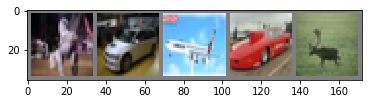

In [9]:
evaluate.show_predicted_actual(model, device, testloader, classes)

In [10]:
evaluate.evaluate_accuracy(model, device, testloader)

Accuracy of the network on the 10000 test images: 88 %


In [11]:
evaluate.evaluate_classwise_accuracy(model, device, classes, testloader)

Accuracy of plane : 75 %
Accuracy of   car : 97 %
Accuracy of  bird : 76 %
Accuracy of   cat : 80 %
Accuracy of  deer : 86 %
Accuracy of   dog : 84 %
Accuracy of  frog : 100 %
Accuracy of horse : 88 %
Accuracy of  ship : 89 %
Accuracy of truck : 96 %
